In [11]:
import re
import numpy as np

super_8_file = open('8_01_al/log.lammps')

super_8_line = super_8_file.readlines()

super_8_data = super_8_line[173:10174]

time = []
time_scaled = []
super_8_sorted = []
f_var_8 = 0
super_8_energy = []
super_8_temp_ave = []
super_8_energy_unit = []

for dat in super_8_data[:9950]:
    split = re.split(' +', dat)
    time.append(float(split[1]))
    
for dat in super_8_data[9950:]:
    split = re.split(' +', dat)
    time.append(float(split[0]))
    
for dat in time:
    time_scaled.append(dat/1000000)

    
    
for dat in super_8_data[:9950]:
    split = re.split(' +', dat)
    super_8_sorted.append(float(split[2]))
    
for dat in super_8_data[9950:]:
    split = re.split(' +', dat)
    super_8_sorted.append(float(split[1]))

    
    
for dat in super_8_data[:9950]:
    split = re.split(' +', dat)
    super_8_energy.append(float(split[5]))
    
for dat in super_8_data[9950:]:
    split = re.split(' +', dat)
    super_8_energy.append(float(split[4]))

    
    
for dat in super_8_sorted[:100]:
    diff = (dat - 300)**2
    f_var_8 = f_var_8 + diff
    
f_var_8 = np.sqrt(f_var_8/100)
    
print(f'8x8x8 | damp=0.1 | al - {f_var_8}')      
    
summ = 0    
    
for dat in super_8_sorted:
    summ = summ + float(dat)
    super_8_temp_ave.append(summ/(len(super_8_temp_ave)+1))
    
for dat in super_8_energy:
    super_8_energy_unit.append(dat/(27648))
    
len(super_8_sorted)

8x8x8 | damp=0.1 | al - 1.5585115585955716


10001

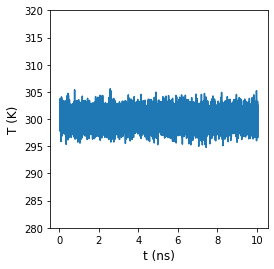

In [40]:
import matplotlib.pyplot as plt

plt.plot(time_scaled, super_8_sorted)
plt.ylim(280, 320)
plt.ylabel('T (K)', size=12)
plt.xlabel('t (ns)', size=12)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('temp.jpg', bbox_inches='tight', dpi=500)

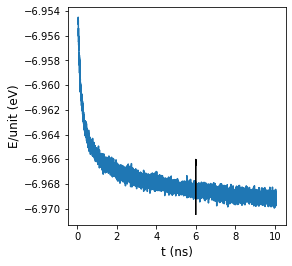

In [39]:
import matplotlib.pyplot as plt

plt.plot(time_scaled, super_8_energy_unit)
plt.ylabel('E/unit (eV)', size=12)
plt.xlabel('t (ns)', size=12)

plt.arrow(6, -6.9665, 0, -0.004, length_includes_head=True, zorder=5)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('ener.jpg', bbox_inches='tight', dpi=500)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(time_scaled, super_8_temp_ave)
plt.ylabel('Average T (K)')
plt.xlabel('t (ns)')

plt.savefig('temp_ave.jpg', bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt

plt.plot(time_scaled[:100], super_8_sorted[:100])
plt.ylim(280, 320)
plt.ylabel('T (K)')
plt.xlabel('t (ps)')
plt.text(50, 282, 'mean dev.=1.56', fontweight='bold', fontstyle='oblique')

plt.savefig('temp_early.jpg', bbox_inches='tight')